In [19]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

### Reading in from external source

In [20]:
geo = "GSE93300"
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Qu2017", silent=True)
#table = pd.read_csv("../Dataset/Fehlman2020/expression_matrix.csv", sep="\t")
#table = pd.read_csv("../Dataset/Wozniak2015/GSE64591_non-normalized.txt", sep="\t", header=5)

In [21]:
table = pd.concat((val.table.iloc[:,1:] for val in data.gsms.values()), axis=1).transpose()
mirnas = list(data.gsms.values())[0].table.iloc[:,0]

In [22]:
table

,0,1,2,3,4,5,6,7,8,9,...,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548
VALUE,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,...,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994
VALUE,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,...,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311
VALUE,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,...,-6.005052,-6.005052,-6.005052,-1.093576,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052
VALUE,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,...,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978
VALUE,-7.405798,-7.405798,0.561665,-7.405798,-7.405798,-2.051536,-7.405798,-7.405798,-7.405798,-7.405798,...,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798
VALUE,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,...,-6.887403,-6.887403,-1.452145,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403
VALUE,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,...,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704
VALUE,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,...,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757
VALUE,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,...,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224
VALUE,-8.948247,-8.948247,-2.495316,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,...,-8.948247,-8.948247,-3.548126,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247


### Seperate case and controls

In [23]:
list(data.gsms.values())[5].metadata["characteristics_ch1"][5].split(" ")[2]

'IV'

In [24]:
set([k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values())])

{'plasma: healthy donor', 'plasma: primary lung cancer'}

In [25]:
sick = np.array(["cancer" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values())])
controls = 1 - sick

In [26]:
sum(controls)

4

### Drop NAN

In [27]:
table = table.dropna(1)

C:\Users\olefr\AppData\Local\Temp/ipykernel_8684/1927661217.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


### T-test

In [28]:
X = table

In [29]:
X

,0,1,2,3,4,5,6,7,8,9,...,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548
VALUE,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,...,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994
VALUE,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,...,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311
VALUE,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,...,-6.005052,-6.005052,-6.005052,-1.093576,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052
VALUE,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,...,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978
VALUE,-7.405798,-7.405798,0.561665,-7.405798,-7.405798,-2.051536,-7.405798,-7.405798,-7.405798,-7.405798,...,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798
VALUE,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,...,-6.887403,-6.887403,-1.452145,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403
VALUE,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,...,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704
VALUE,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,...,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757
VALUE,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,...,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224
VALUE,-8.948247,-8.948247,-2.495316,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,...,-8.948247,-8.948247,-3.548126,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247


In [30]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [31]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [32]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [33]:
mirnas.iloc[lowest], pvalues

(1366    A_25_P00010438
 725     A_25_P00013981
 1344    A_25_P00014844
 1586    A_25_P00014020
 1762    A_25_P00014832
 Name: ID_REF, dtype: object,
 array([1.46004280e-05, 3.98421396e-05, 8.41147629e-05, 1.19516628e-04,
        1.83403803e-04]))

### F-test

In [34]:
t3 = table

In [35]:
f, p = f_classif(t3, sick)

In [36]:
np.mean(p)

0.05717715037549747

### ANOVA

In [37]:
t3

,0,1,2,3,4,5,6,7,8,9,...,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548
VALUE,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,...,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994
VALUE,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,...,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311
VALUE,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,...,-6.005052,-6.005052,-6.005052,-1.093576,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052
VALUE,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,...,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978
VALUE,-7.405798,-7.405798,0.561665,-7.405798,-7.405798,-2.051536,-7.405798,-7.405798,-7.405798,-7.405798,...,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798
VALUE,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,...,-6.887403,-6.887403,-1.452145,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403
VALUE,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,...,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704
VALUE,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,...,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757
VALUE,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,...,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224
VALUE,-8.948247,-8.948247,-2.495316,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,...,-8.948247,-8.948247,-3.548126,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247


In [38]:
X = np.array(sick).reshape(-1, 1)

In [39]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [40]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.4717486956519398

### Mean-variance-plot

In [41]:
np.mean(table)

0      -6.703444
1      -6.703444
2      -5.040537
3      -6.703444
4      -6.703444
          ...   
2544   -6.703444
2545   -6.703444
2546   -6.703444
2547   -6.703444
2548   -6.703444
Length: 2549, dtype: float64

In [42]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [43]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

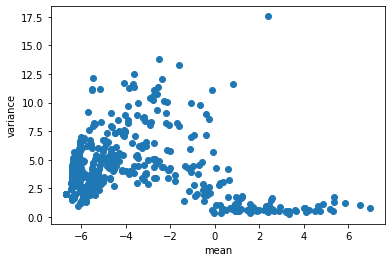

In [44]:
mean_variance_plot(table)

In [45]:
mask = np.mean(table) > -4
table = table.loc[:, mask]
mirnas = mirnas[mask]

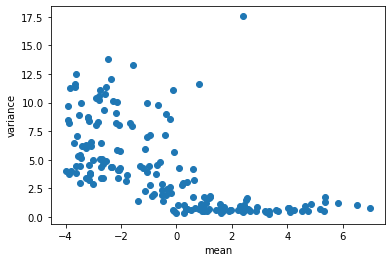

In [46]:
mean_variance_plot(table)

### Loess regression

In [47]:
lowess = LowessRegression(sigma=1, span=0.1)

In [48]:
means, variances = get_means_and_variances(table)
lowess.fit(means.to_numpy().reshape(-1,1), variances)

LowessRegression(span=0.1)

In [49]:
x_axis = np.linspace(-2, 14, 100)
y_axis = lowess.predict(x_axis.reshape(-1,1))

[]

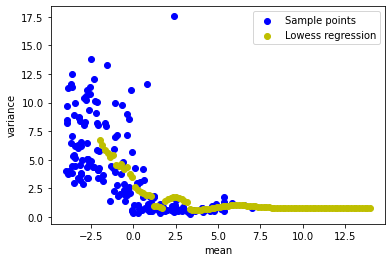

In [50]:
plt.scatter(means, variances, color="b")
plt.scatter(x_axis, y_axis, color="y")
plt.xlabel("mean")
plt.ylabel("variance")
plt.legend(["Sample points", "Lowess regression"])
plt.plot()

### Lowess normalization

In [51]:
adj_var = lowess.predict(means.to_numpy().reshape(-1, 1))

In [52]:
table /= np.sqrt(adj_var)

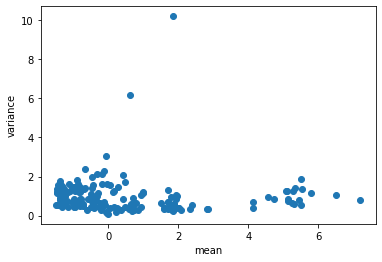

In [53]:
mean_variance_plot(table)

### Log transformation

In [54]:
log_table = table #np.log2(table)

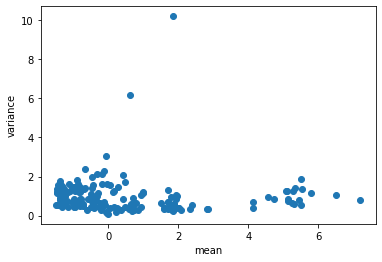

In [55]:
mean_variance_plot(log_table)

In [56]:
norm_log_table = log_table - np.mean(log_table)

In [57]:
norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

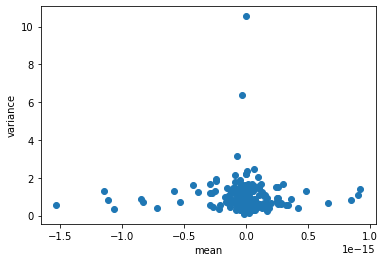

In [58]:
mean_variance_plot(norm_log_table)

### PCA

In [59]:
pca = decomposition.PCA(n_components=10)

In [60]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [61]:
pca.explained_variance_ratio_

array([0.33891213, 0.26041467, 0.11540806, 0.06991262, 0.05121498,
       0.04534925, 0.03871847, 0.02544326, 0.02195983, 0.01759451])

In [62]:
components = pca.transform(norm_log_table)

In [63]:
components.shape

(13, 10)

In [64]:
sum(controls)

4

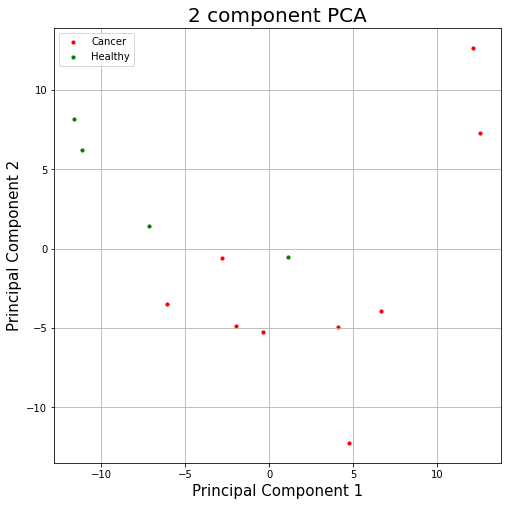

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [66]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

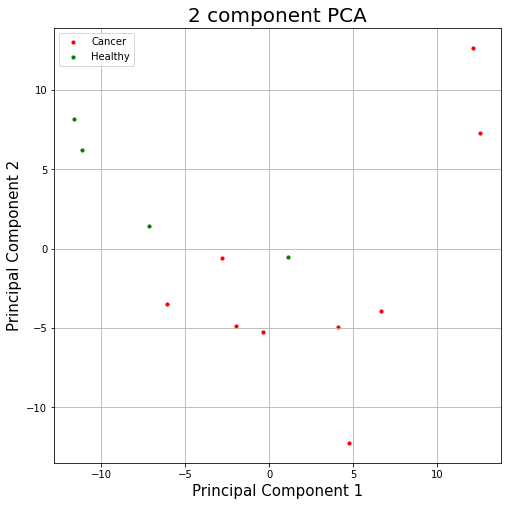

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [68]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][2] for k in list(data.gsms.values())])
age = np.array([float(k.metadata["characteristics_ch1"][1].split(" ")[1].replace("NA", "NaN")) for k in list(data.gsms.values())])

In [69]:
covars = pd.DataFrame(np.array([sex, age]).transpose(), columns=["sex", "age"])

In [70]:
covars = covars.fillna(covars.mean())

In [71]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [72]:
adj_norm_log_table = norm_log_table - linreg.predict(covars)

# PCA

In [73]:
pca = decomposition.PCA(n_components=2)

In [74]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [75]:
components = pca.transform(adj_norm_log_table)

In [76]:
components

array([[ -3.22705426,  -3.37583711],
       [ -5.66650594,  -3.56156897],
       [ -4.02516439,  -3.3869524 ],
       [  6.15692581,  -7.87853497],
       [ 12.5196807 ,  12.14588266],
       [ -0.92459179,  -1.77031519],
       [  1.78657328, -11.73197388],
       [  3.88748258,  -3.29634154],
       [ 14.83263045,   3.62952116],
       [-10.76447798,   8.66090699],
       [ -8.30900278,   8.20641433],
       [ -0.17703992,   0.98431529],
       [ -6.08945574,   1.37448364]])

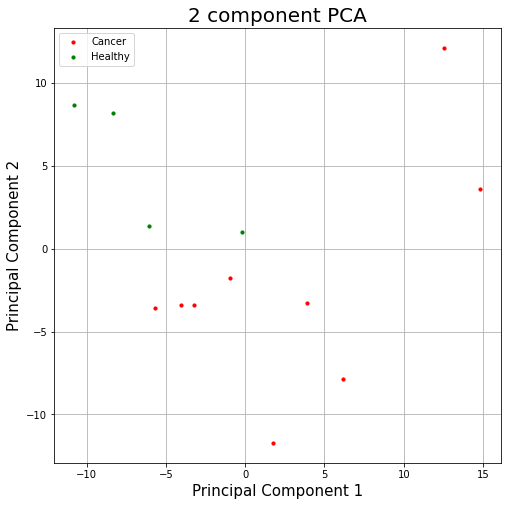

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [78]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


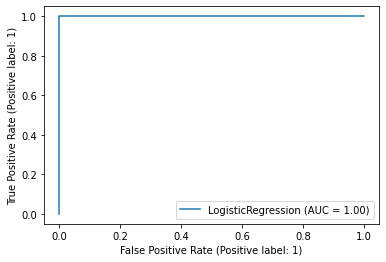

In [80]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [81]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[14:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


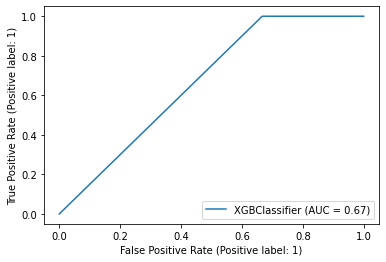

In [82]:
plot_roc_curve(model, X_test, y_test)

### Exporting data

In [83]:
lookup_table = data.gpls["GPL21576"].table

In [84]:
lookup_table = lookup_table.set_index("ID")
lookup_table.head()

,miRNA_ID,SPOT_ID,GENE_SYMBOL,GENE_NAME,ACCESSION_STRING,CHROMOSOMAL_LOCATION,SPOT_ID.1
ID,,,,,,,
(-)3xSLv1,NaN,--NegativeControl,NaN,NaN,NaN,NaN,NaN
A_25_P00010019,hsa-miR-329-3p,NaN,hsa-miR-329-3p,hsa-miR-329-3p,mir|hsa-miR-329-3p|mir|MIMAT0001629|mir|hsa-mi...,"chr14:101493173-101493192,chr14:101493490-1014...",NaN
A_25_P00010020,hsa-miR-329-3p,NaN,hsa-miR-329-3p,hsa-miR-329-3p,mir|hsa-miR-329-3p|mir|MIMAT0001629|mir|hsa-mi...,"chr14:101493174-101493192,chr14:101493491-1014...",NaN
A_25_P00010021,hsa-miR-655-3p,NaN,hsa-miR-655-3p,hsa-miR-655-3p,mir|hsa-miR-655-3p|mir|MIMAT0003331|mir|hsa-mi...,chr14:101515949-101515968,NaN
A_25_P00010023,hsa-miR-369-3p,NaN,hsa-miR-369-3p,hsa-miR-369-3p,mir|hsa-miR-369-3p|mir|MIMAT0000721,unmapped,NaN


In [85]:
access_ids = lookup_table.loc[mirnas]["ACCESSION_STRING"]

In [86]:
access_ids = [a.split("|")[-1] for a in access_ids]

In [87]:
access_ids[:10]

['MIMAT0027403',
 'MIMAT0019034',
 'MIMAT0019337',
 'MIMAT0018925',
 'MIMAT0031180',
 'MIMAT0018087',
 'MIMAT0019044',
 'MIMAT0000681',
 'MIMAT0000067',
 'MIMAT0018076']

In [88]:
from Scripts import converters

In [89]:
sequences = converters.mirbase_to_seq(access_ids)

In [90]:
sequences[:10]

['ACUGAGCCUCUCUCUCUCCAG',
 'GAGGCUGAAGGAAGAUGG',
 'GGCGGCGGCGGAGGCGGGGG',
 'CGGGCGUGGUGGUGGGGGUG',
 'UUCCCAGCCAACGCACCA',
 'AGCAGGUGCGGGGCGGCG',
 'CUGGGUUGGGCUGGGCUGGG',
 'UAGCACCAUUUGAAAUCGGUUA',
 'UGAGGUAGUAGAUUGUAUAGUU',
 'GGCGGGUGCGGGGGUGG']

In [91]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = sick
stage = lambda x: x.count("I") + 3*x.count("V")
adj_norm_log_table["stage"] = [stage(m.metadata["characteristics_ch1"][5].split(" ")[2]) for m in data.gsms.values()]
adj_norm_log_table.head()

,ACUGAGCCUCUCUCUCUCCAG,GAGGCUGAAGGAAGAUGG,GGCGGCGGCGGAGGCGGGGG,CGGGCGUGGUGGUGGGGGUG,UUCCCAGCCAACGCACCA,AGCAGGUGCGGGGCGGCG,CUGGGUUGGGCUGGGCUGGG,UAGCACCAUUUGAAAUCGGUUA,UGAGGUAGUAGAUUGUAUAGUU,GGCGGGUGCGGGGGUGG,...,AGAGGCUUUGUGCGGAUACGGGG,AGGCUGGGCUGGGACGGA,AAAAGGCGGGAGAAGCCCCA,UAAGGAGGGGGAUGAGGGG,GCGGAGAGAGAAUGGGGAGC,CCCCAGGGCGACGCGGCGGG,UGGAGAGAAAGGCAGUUCCUGA,CUGGGCCCGCGGCGGGCGUGGGG,cancer,stage
VALUE,-1.154802,0.053906,0.472068,0.063615,0.258351,0.139761,-0.410949,-0.633798,-0.818818,-0.064587,...,0.360669,-0.147310,-1.716234,0.033606,0.452784,0.202536,1.001571,-0.077499,True,4
VALUE,-1.964716,-1.106291,0.191482,-0.188441,-0.611388,0.655252,0.147290,0.668741,0.523950,0.212599,...,0.485810,0.237689,0.083531,0.312093,0.428511,0.209257,0.251844,0.134653,True,4
VALUE,-0.998966,0.645477,0.081713,-0.301636,0.580450,0.184314,-0.148045,0.956082,1.206442,0.106621,...,0.413579,0.081924,0.940516,-0.055618,-1.428965,0.074229,-0.695592,-0.068584,True,3
VALUE,-0.826294,2.069404,0.220761,0.391675,-0.158615,0.748723,0.797250,-1.155767,-0.941606,0.378608,...,0.604869,0.425942,1.060024,-0.156189,-0.511261,0.339858,-0.967818,0.570015,True,4
VALUE,0.876604,0.431462,-1.528840,0.301271,-0.596352,-1.627794,-0.955355,-1.277014,-1.414301,-1.226419,...,-0.271947,-1.116701,-0.085957,-0.263272,0.172690,-0.766393,-1.225074,-0.917455,True,4


In [92]:
adj_norm_log_table.to_csv("../TransformedData/Qu2017_staged.csv", index=False)